In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

Graph for weekly pump prices in the NCR

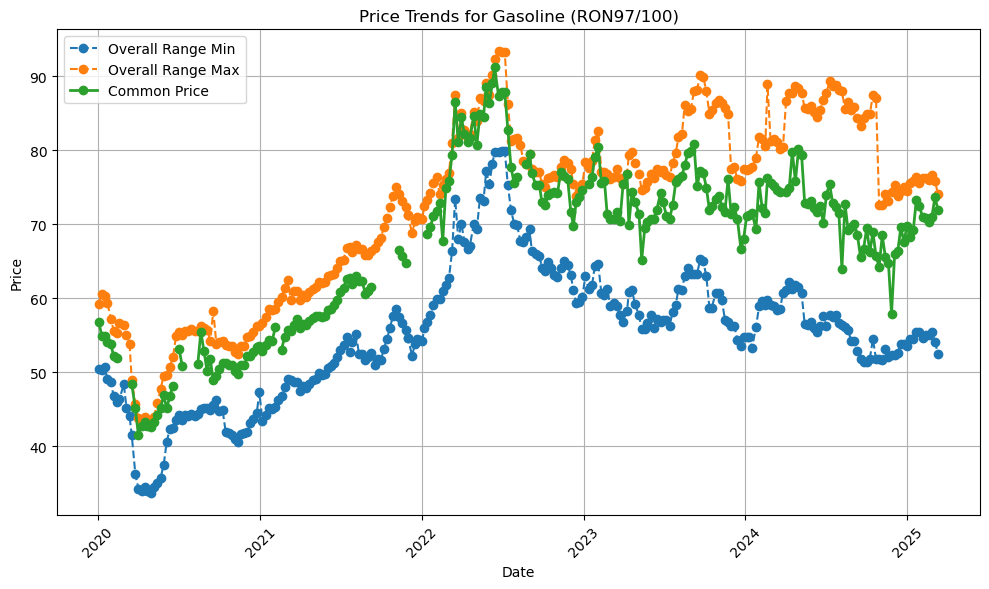

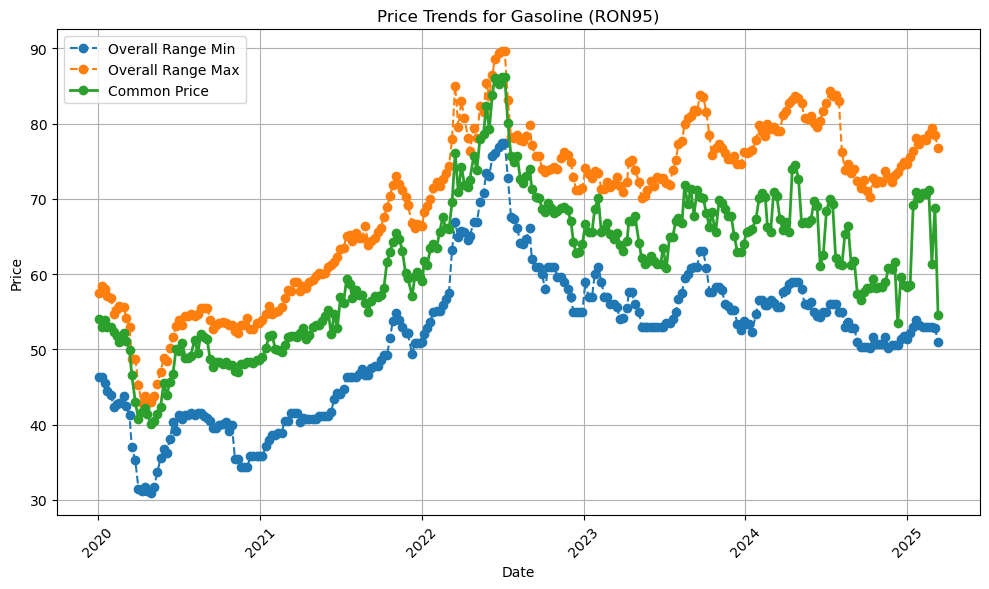

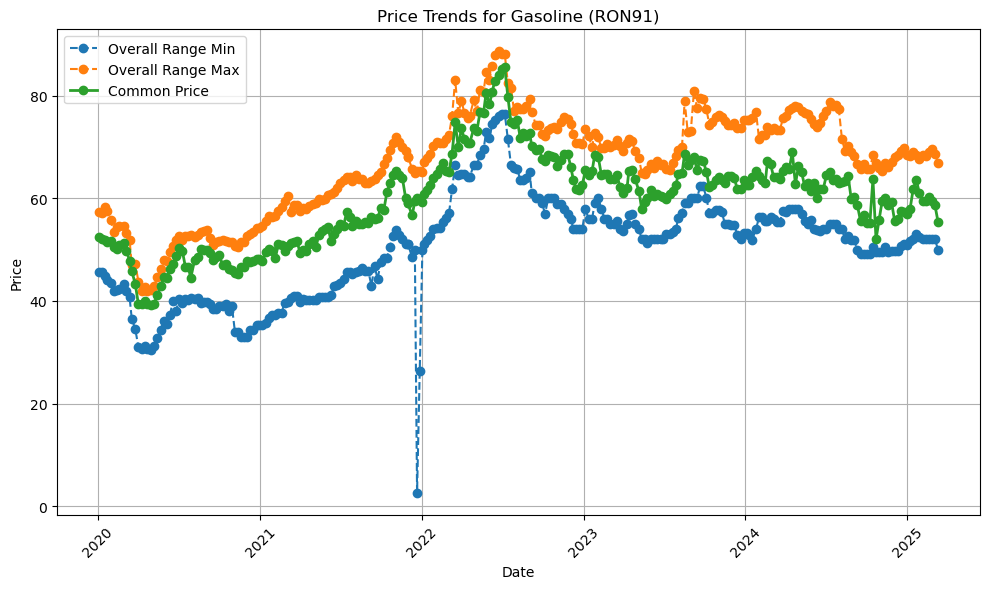

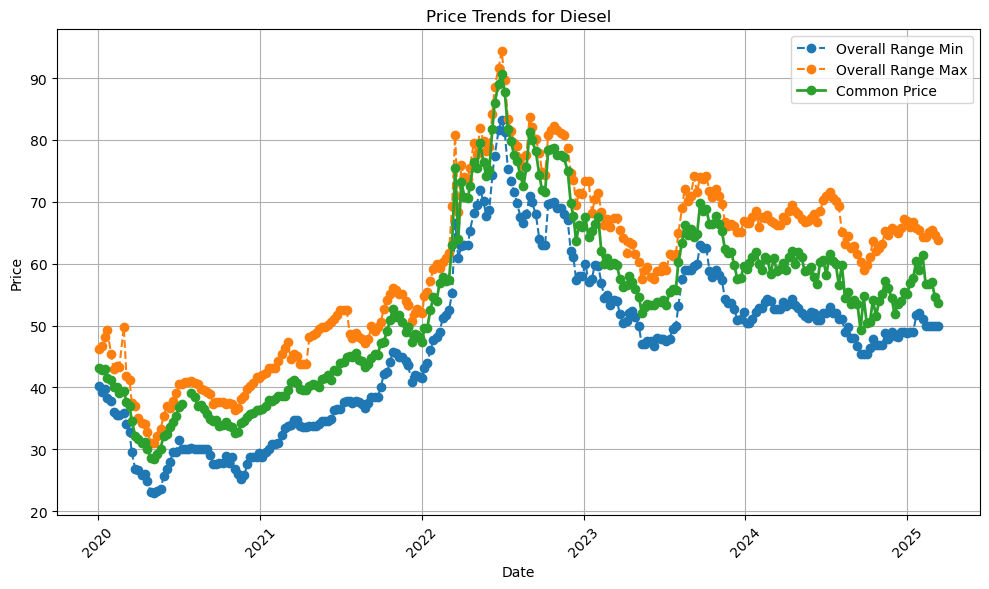

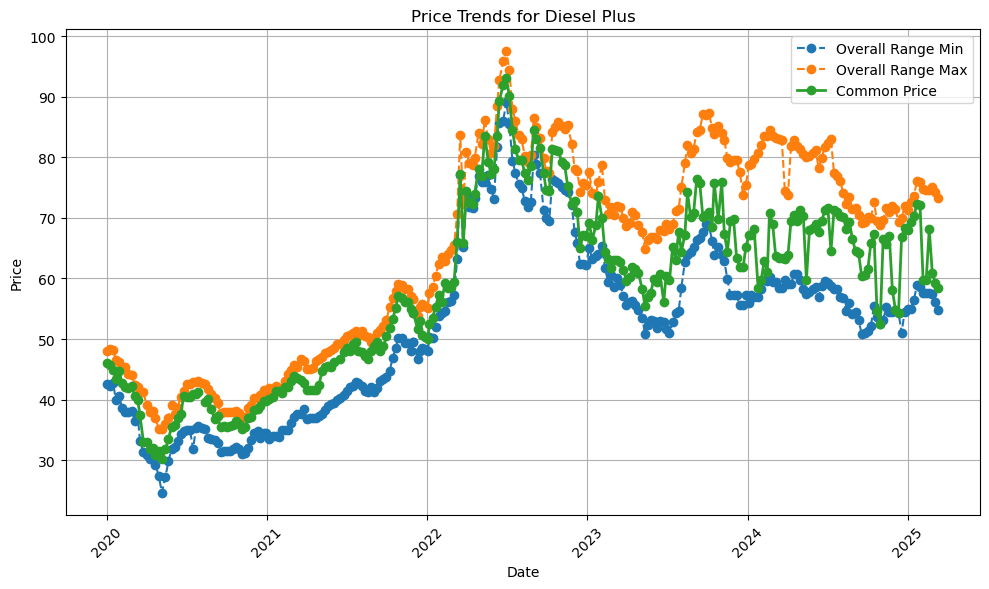

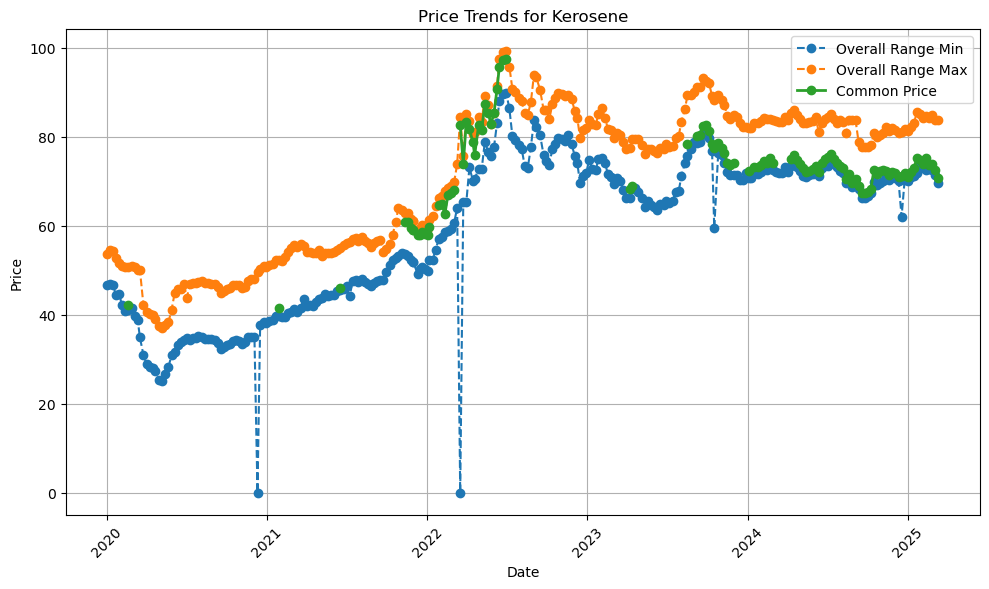

In [15]:
# Load the data
df = pd.read_csv("WeeklyPumpPrices.csv")  # Replace with your file path

# Convert 'Date' to datetime for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

# Get unique product types
products = df['Product'].unique()

# Create a separate plot for each product
for product in products:
    # Filter data for the current product
    product_data = df[df['Product'] == product].sort_values('Date')
    
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Plot the three price lines
    plt.plot(product_data['Date'], product_data['Overall Range Min'], 
             label='Overall Range Min', marker='o', linestyle='--')
    plt.plot(product_data['Date'], product_data['Overall Range Max'], 
             label='Overall Range Max', marker='o', linestyle='--')
    plt.plot(product_data['Date'], product_data['Common Price'], 
             label='Common Price', marker='o', linestyle='-', linewidth=2)
    
    # Customize the plot
    plt.title(f'Price Trends for {product}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

NOTE: it might be better to focus on 1 or 2 gas types

Graph showing price range and common price:

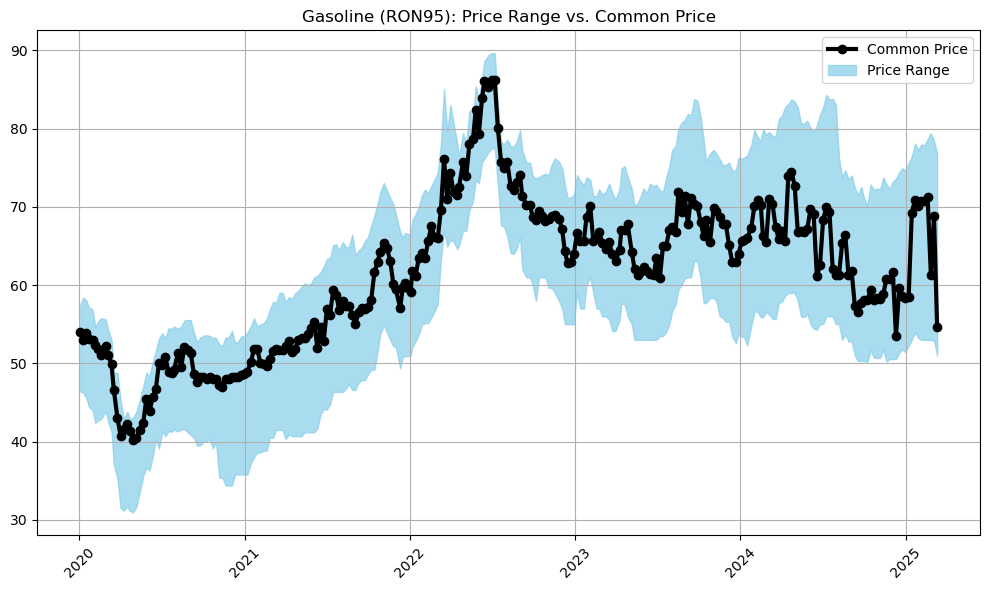

In [16]:
plt.figure(figsize=(10, 6))
product_data = df[df['Product'] == "Gasoline (RON95)"].sort_values('Date')

# Plot the common price as a bold line
plt.plot(product_data['Date'], product_data['Common Price'], 
         label='Common Price', color='black', linewidth=3, marker='o')

# Shade the area between min and max
plt.fill_between(product_data['Date'], 
                 product_data['Overall Range Min'], 
                 product_data['Overall Range Max'], 
                 color='skyblue', alpha=0.7, label='Price Range')

plt.title("Gasoline (RON95): Price Range vs. Common Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Monthly gas prices graph:

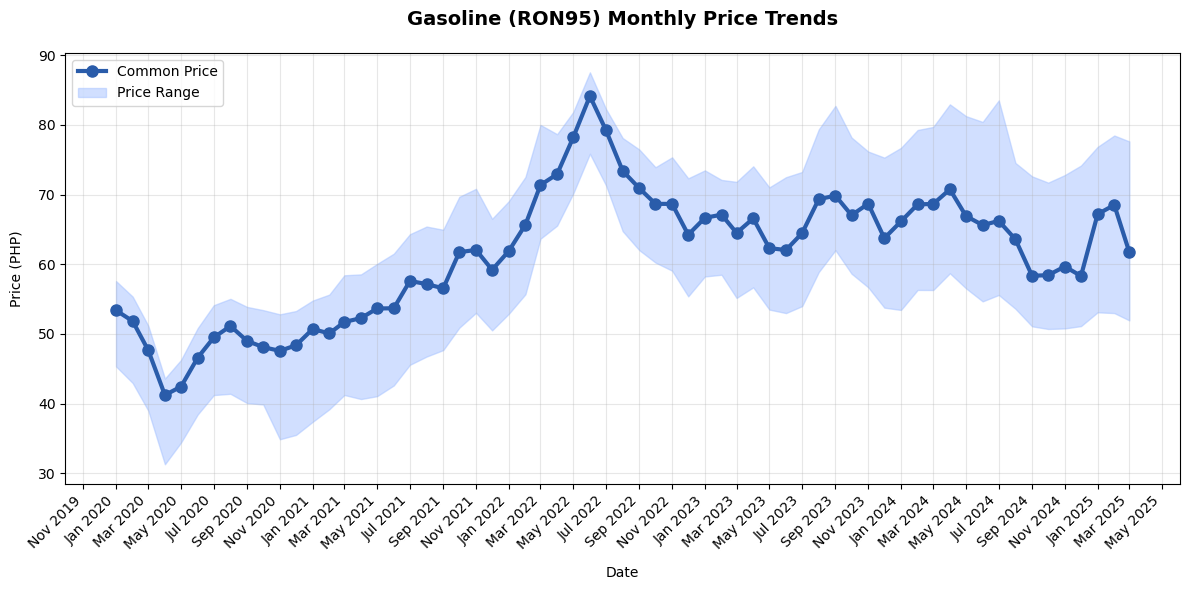

In [24]:
# Load and prepare the data
df = pd.read_csv('MonthlyPumpPrices.csv', parse_dates=['Date'])
ron95_data = df[df['Product'] == "Gasoline (RON95)"].sort_values('Date')

# Create the plot
plt.figure(figsize=(12, 6))

# Main price line
plt.plot(ron95_data['Date'], ron95_data['Common Price'],
         color='#2a5caa', linewidth=3, marker='o', markersize=8,
         label='Common Price')

# Price range shading
plt.fill_between(ron95_data['Date'],
                 ron95_data['Overall Range Min'],
                 ron95_data['Overall Range Max'],
                 color='#a4c1ff', alpha=0.5, label='Price Range')

# Formatting
plt.title("Gasoline (RON95) Monthly Price Trends", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Date", labelpad=10)
plt.ylabel("Price (PHP)", labelpad=10)
plt.legend(frameon=True, loc='upper left')

# Date formatting
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right')

# Grid and layout
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()